In [20]:
import pandas as pd
import string

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

import numpy as np # linear algebra

import os

In [21]:
hotel_df = pd.read_csv("Hotel_Reviews.csv")
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Append the positive and negative text reviews

In [22]:
hotel_df["review"] = hotel_df["Negative_Review"] + hotel_df["Positive_Review"]

Create the label

In [23]:
hotel_df["is_bad_review"] = hotel_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

Select only relevant columns

In [24]:
hotel_df = hotel_df[["review", "is_bad_review"]]
hotel_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


Sample data
Reviews data is sampled in order to speed up computations.

In [25]:
hotel_df = hotel_df.sample(frac = 0.1, replace = False, random_state=42)

Clean data

Remove 'No Negative' or 'No Positive' from text
    
    If the user doesn't leave any negative feedback comment, this will appear as "No Negative" in our data.
    
    The same goes when users did not leave any positive feedback
    
    Thus, we must remove these from our text for further analysis

In [26]:
hotel_df["review"] = hotel_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

Return the wordnet object value corresponding to POS tag

In [27]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Text cleaning

In [28]:
def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [29]:
hotel_df.head()

,review,is_bad_review
488440,Would have appreciated a shop in the hotel th...,0
274649,No tissue paper box was present at the room,0
374688,Pillows Nice welcoming and service,0
404352,Everything including the nice upgrade The Hot...,0
451596,Lovely hotel v welcoming staff,0


In [30]:
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Clean text data

In [31]:
hotel_df["review_clean"] = hotel_df["review"].apply(lambda x: clean_text(x))
hotel_df.head()

,review,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff


To clean the data, we call the 'clean_text' function which performs the following transformations:
    
    1) Lower the text
    
    2) Split the text into words and take out punctuations
    
    3) Delete words that contain numbers
    
    4) Remove filler words like 'a', 'the' etc
    
    5) Part-Of-Speech (POS) tagging: assign a tag to each word to determine if it corresponds to a noun, a verb, etc. 
    
    6) Transform every word into its root form, including plural words and past tense. For example: rooms -> room, slept -> sleep

Feature engineering

In [32]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Resource vader_lexicon not found.
# Please use the NLTK Downloader to obtain the resource:
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
hotel_df["sentiments"] = hotel_df["review"].apply(lambda x: sid.polarity_scores(x))
hotel_df = pd.concat([hotel_df.drop(['sentiments'], axis=1), hotel_df['sentiments'].apply(pd.Series)], axis=1)

In [33]:
hotel_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717


Firstly, we add sentiment analysis features because we assume that customers' reviews are closely related to how they feel about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a range of words to find which reviews are positives or negatives. It also studies the context of the sentences to determine the sentiment scores.

For each text, Vader returns 4 values:

neutrality score, positivity score, negativity score and an overall score that summarizes the previous scores

We will integrate those 4 values as features in our dataset.

In [34]:
# add number of characters column
hotel_df["nb_chars"] = hotel_df["review"].apply(lambda x: len(x))

# add number of words column
hotel_df["nb_words"] = hotel_df["review"].apply(lambda x: len(x.split(" ")))

In [35]:
hotel_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7


Next, we add some simple metrics for every text:

The number of characters and number of words in the text

In [36]:
# create doc2vec vector columns
# gensim is a Python framework for fast Vector Space Modelling
!python -m pip install -U gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(hotel_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = hotel_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
hotel_df = pd.concat([hotel_df, doc2vec_df], axis=1)


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [37]:
hotel_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.107030,0.415277,-0.231441,0.008663,-0.081933
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.029936,0.112974,0.054542,-0.053630,0.005080
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,-0.030458,0.130514,0.177352,0.055071,0.068671
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.069832,0.153456,-0.042870,-0.150656,0.099767
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.071528,0.078861,-0.010821,0.001034,-0.067852


Next, we extract vector representations for the reviews. 

Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear. Similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors. Same texts will have similar representations, thus, we can use those vectors as our training features.

We train a Doc2Vec model by feeding in our text data. By applying this model to the reviews, we can obtain those representation vectors.

### Term frequency-inverse document frequency (TF-IDF) can quantify the vitality or relevance of string representations in a document

In [38]:
# add tf-idfs columns

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(hotel_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = hotel_df.index
hotel_df = pd.concat([hotel_df, tfidf_df], axis=1)

In the final step, we add the TF-IDF values for every word and document.

The TF computes the average number of times the word appears in the text. The IDF then calculates the significance of this word depending on how many texts the word can be found. We then add the TF-IDF columns for every word that appears in at least 10 different texts to filter some of them and to reduce the size of the output.

In [39]:
hotel_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.107030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.029936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,-0.030458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.069832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.071528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
hotel_df.shape

(51574, 3840)

## Exploratory data analysis


In [41]:
# show is_bad_review distribution
hotel_df["is_bad_review"].value_counts(normalize = True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

Our dataset is highly imbalanced because less than 5% of our reviews are considered negative ones. 
#### Print word clouds to see what kind of words appear in the reviews 


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


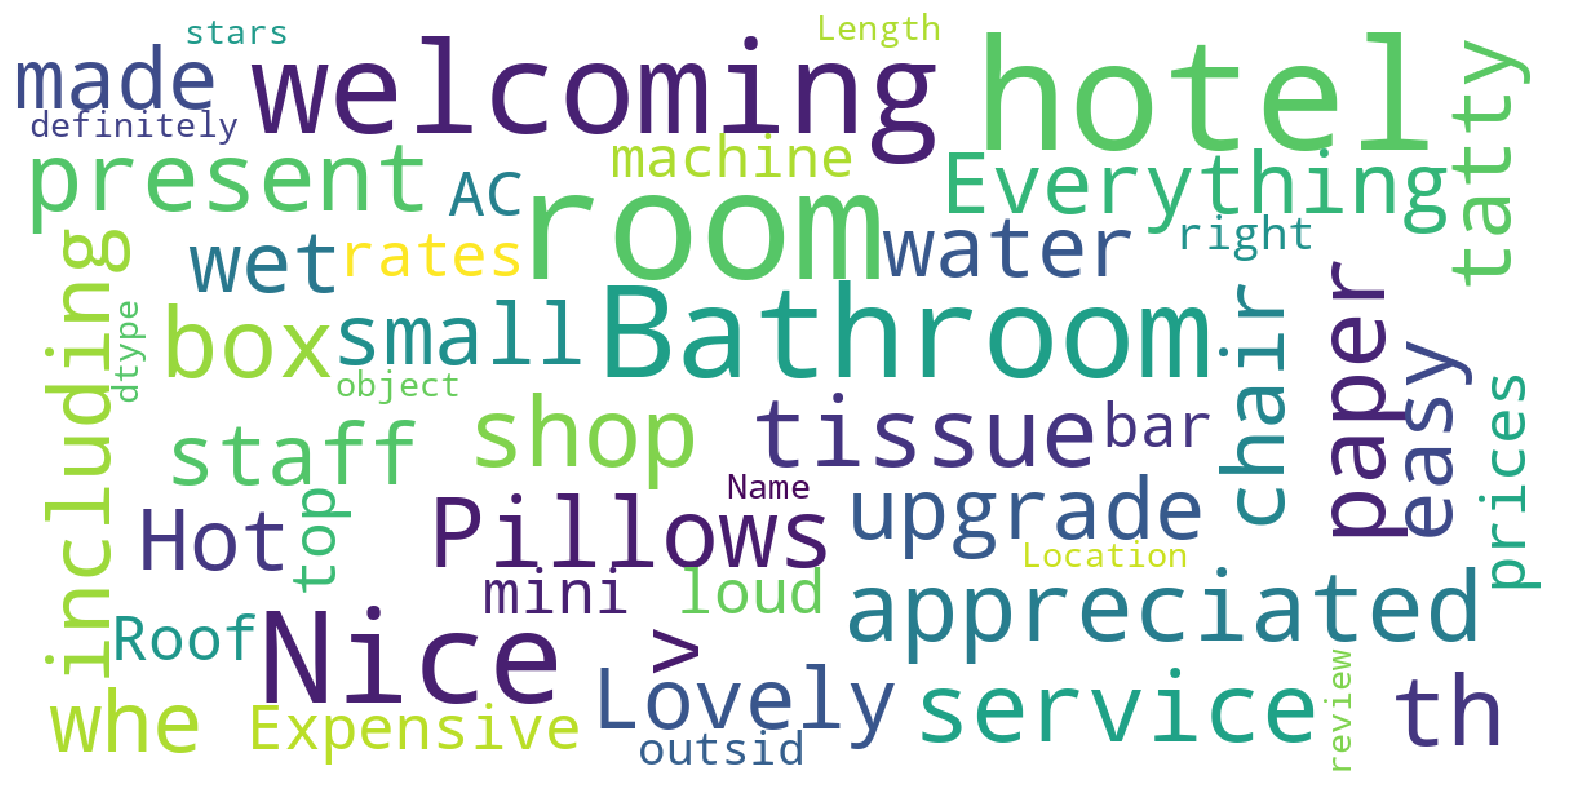

In [42]:
# wordcloud function
!pip3 install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(hotel_df["review"])

It is clear that most words are related to the hotels, such as room, bathroom, breakfast, etc.

Some words are likely to be associated with the customer experience with their hotel stay, such as appreciated, expensive, dislike, service etc.

#### Finding the highest positive sentiment reviews with more than 5 words

In [43]:
hotel_df[hotel_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


Most positive reviews contain positive feedbacks

#### Finding lowest negative sentiment reviews with more than 5 words

In [44]:
hotel_df[hotel_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


There is an issue with the negative reviews. The code interprets 'no' or 'nothing' as negative words but in reality, they may not represent negative things. For example, when a customer reviewed that there is nothing wrong, the code may think that the review is bad.

However, most of the reviews are bad.

#### Plot sentiment distribution for positive and negative reviews

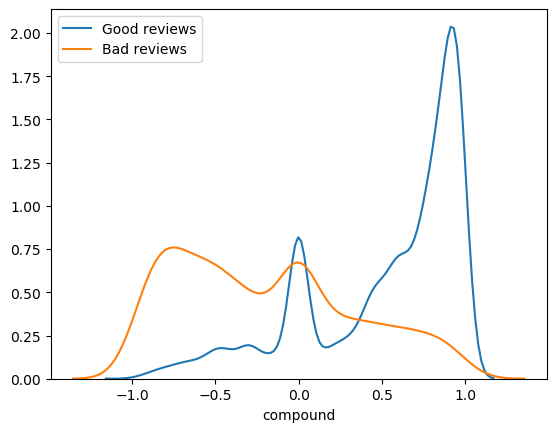

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


for x in [0, 1]:
    subset = hotel_df[hotel_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
    #sns.displot(subset['compound'], label = label, kind="kde")
    #sns.histplot(subset['compound'], label = label, kde=True)

plt.show()

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that most good reviews considered very positive by the algorithm. On the other hand, bad reviews tend to have lower compound sentiment scores.

This shows us that previously computed sentiment features will be very important in our modeling part.

### Modeling Reviewer Score

In [46]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in hotel_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hotel_df[features], hotel_df[label], test_size = 0.20, random_state = 42)

First, we choose which features to use to train our model. Then we split our data into two parts:

1) One to train our model and

2) One for testing the accuracy of the model

We will use the Random Forest for our predictions

In [47]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.038977
2,pos,0.025744
6,doc2vec_vector_0,0.023262
0,neg,0.022595
10,doc2vec_vector_4,0.018209
8,doc2vec_vector_2,0.017472
7,doc2vec_vector_1,0.016607
9,doc2vec_vector_3,0.016369
4,nb_chars,0.016313
1,neu,0.015039


The most important features are the ones that came from the previous sentiment analysis.

The vector representations of the texts are very important in our training, together with some words which may be important as well.

## ROC curve

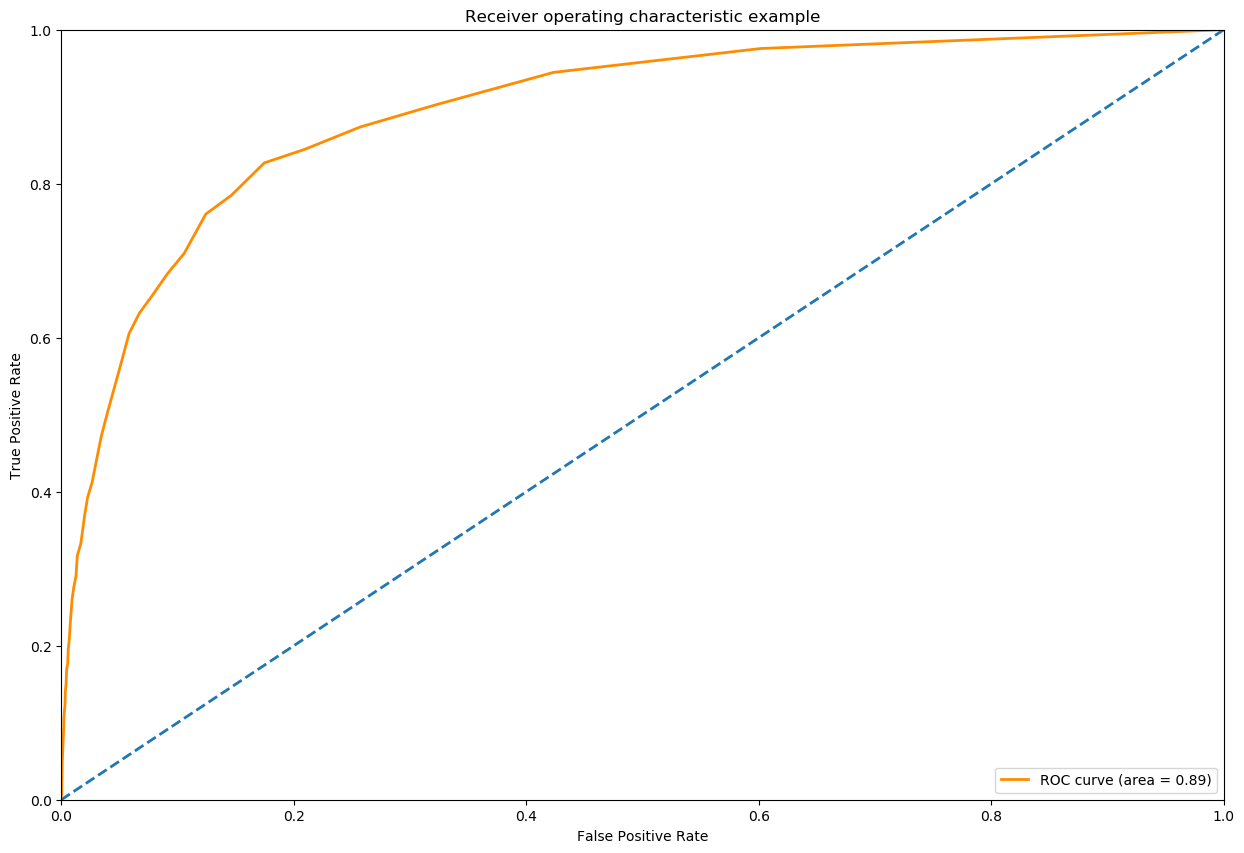

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Receiver Operating Characteristic (ROC) curve is a graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the area under the ROC is very good, we still cannot use the ROC curve to assess the quality of our model. This is due to the False Positive Rate formula, which is the number of False Positives / number of Negatives, corresponding to the x-axis of the ROC curve.

Here the number of Negatives corresponds to the number of good reviews which is very high because the dataset is imbalanced. This means that even with some False Positives, our false positive rate will tend to stay very low. Our model may make a lot of false positive predictions and still have a low false positive rate while increasing the true positive rate and therefore artificially increasing the AUC ROC metric. Therefore, our results may not be as accurate as we thought. 

## Precision-Recall (PR) curve


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


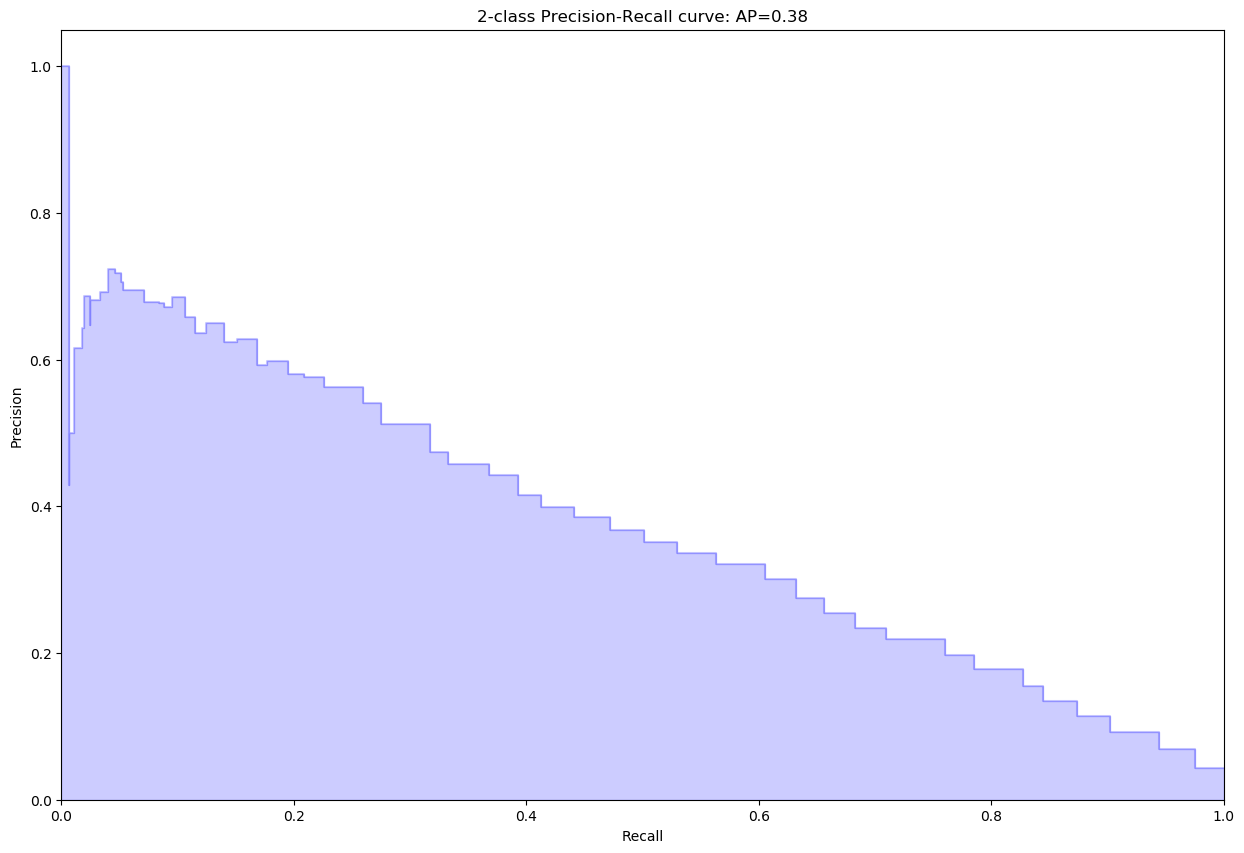

In [49]:
from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature
!pip install funcsigs
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

We use the Precision Recall curve and find the area under the curve, as this curve is more suited for imbalanced situations. This is also known as Average Precision (AP)

The precision decreases when we increase the recall. This means that we need to choose a prediction threshold that is suited to our needs. High recall means a low prediction threshold is needed that will allow us to detect most of the observations of the positive class, but with low precision. Low recall means a high prediction threshold is needed and this will improve the precision significantly, but this would mean we will not be able to find all the positive observations. 

The AP metric is used to understand if our model is better than other models. We compare it to a simple decision baseline. We take a random classifier as a baseline that would predict half of the time 1 and half of the time 0 for the label.

This classifier have a precision of 4.3%, which corresponds to the proportion of positive observations. For every recall value, the precision would stay the same, and this would lead us to an AP of 0.043. The AP of our model is approximately 0.38, which is more than 8 times higher than the AP of the random method. This means that our model is accurate.

## Conclusion

Given that our model is accurate base on the average precision metric. Our model can be useful to hotel business owners to analyse the overall guest experience. This is particularly useful for monitoring sentiment on sites which do not offer users the ability to rate their stay, such as social media. When such ratings are unavailable, hotel owners can use our model to gauge comments such as social media posts relevant to the hotel to evaluate the overall sentiment on the guest experience at their hotels and thus work on various hotel services accordingly.